In [56]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 16
from scipy import fftpack
from scipy.ndimage import gaussian_filter
from scipy import signal
import scipy
import warnings
warnings.filterwarnings('ignore')

In [57]:
fileroot = '../Data/Cement_sample_wt_sand/sample4/'

## Data Input

In [58]:
dfo1run1 = pd.read_csv(fileroot+'O1/delays-from-all-runs/Cement_sand_O1_Run1.txt', delimiter=' '
                       , dtype= np.float64)
dfo1run2 = pd.read_csv(fileroot+'O1/delays-from-all-runs/Cement_sand_O1_Run2.txt', delimiter=' '
                       , dtype= np.float64)
dfo1run3 = pd.read_csv(fileroot+'O1/delays-from-all-runs/Cement_sand_O1_Run3.txt', delimiter=' '
                       , dtype= np.float64)
dfo1run4 = pd.read_csv(fileroot+'O1/delays-from-all-runs/Cement_sand_O1_Run4.txt', delimiter=' '
                       , dtype= np.float64)
dfo1run5 = pd.read_csv(fileroot+'O1/delays-from-all-runs/Cement_sand_O1_Run5.txt', delimiter=' '
                       , dtype= np.float64)
dfo1run6 = pd.read_csv(fileroot+'O1/delays-from-all-runs/Cement_sand_O1_Run6.txt', delimiter=' '
                       , dtype= np.float64)

In [60]:
dfO1 = pd.concat([dfo1run1['Delays'], dfo1run1['Time-delay1'], dfo1run2['Time-delay2'], dfo1run3['Time-delay3'], 
                  dfo1run4['Time-delay4']], axis=1)
dfO1 = dfO1.rename(columns={"Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3", 
                            "Time-delay4": "Run4"}, errors="raise")
dfO1 = pd.concat([dfO1, dfo1run5['Time-delay1'], dfo1run6['Time-delay2']], axis=1)
dfO1 = dfO1.rename(columns={"Time-delay1": "Run5", "Time-delay2": "Run6"}, errors="raise")
dfO1

,Delays,Run1,Run2,Run3,Run4,Run5,Run6
0,0.0,-4.570577,0.674690,1.582653,0.640835,0.592366,-0.396987
1,1.0,-3.938221,-0.084797,0.353563,-0.149408,-0.197572,-1.148990
2,2.0,-5.536390,0.090165,0.393859,-0.066795,-0.109635,-1.189286
3,3.0,-4.678913,0.357251,-0.516946,0.211520,-0.198829,-0.942152
4,4.0,-3.950428,0.169172,-1.523557,0.157720,-0.023081,-0.723905
...,...,...,...,...,...,...,...
94,94.0,0.123344,0.665947,0.910496,0.755936,0.558353,0.912621
95,95.0,0.858474,0.969516,1.018961,0.445616,0.369492,-0.043192
96,96.0,-0.006294,-0.423026,0.385808,-0.123292,-0.061388,0.044153
97,97.0,0.010250,1.145798,1.428251,0.524055,0.412695,0.590391


In [70]:
dfo2run1 = pd.read_csv(fileroot+'O2/delays-from-all-runs/Cement_sand_O2_Run1.txt', delimiter=' '
                       , dtype= np.float64)
dfo2run2 = pd.read_csv(fileroot+'O2/delays-from-all-runs/Cement_sand_O2_Run2.txt', delimiter=' '
                       , dtype= np.float64)
dfo2run3 = pd.read_csv(fileroot+'O2/delays-from-all-runs/Cement_sand_O2_Run3.txt', delimiter=' '
                       , dtype= np.float64)
dfo2run4 = pd.read_csv(fileroot+'O2/delays-from-all-runs/Cement_sand_O2_Run4.txt', delimiter=' '
                       , dtype= np.float64)

In [71]:
dfO2 = pd.concat([dfo2run1['Delays'], dfo2run1['Time-delay1'], dfo2run2['Time-delay2'], dfo2run3['Time-delay3'], 
                 dfo2run4['Time-delay4']], axis=1)

In [72]:
dfO2 = dfO2.rename(columns={"Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3", 
                     "Time-delay4": "Run4"}, errors="raise")

In [73]:
dfO2

,Delays,Run1,Run2,Run3,Run4
0,0.0,-0.034408,0.969729,0.604915,0.329258
1,1.0,-0.092782,0.213638,0.324046,0.003145
2,2.0,-0.082180,-0.268753,0.246138,-0.127653
3,3.0,-0.093823,-0.431797,0.374830,-0.018637
4,4.0,-0.021148,-0.491851,0.418324,-0.011586
...,...,...,...,...,...
115,115.0,1.156817,0.686181,0.132391,-0.138014
116,116.0,1.552606,0.693539,-0.029520,0.101350
117,117.0,1.478773,0.301851,-0.263750,-0.309604
118,118.0,1.158713,0.671268,0.106370,-0.111944


## Signals

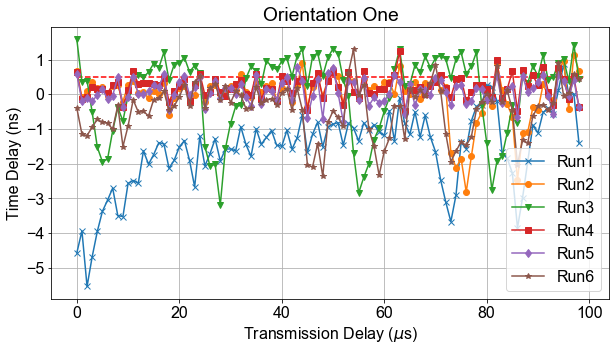

In [63]:
plt.figure(figsize=(10,5))
[plt.plot(dfO1['Delays'], dfO1[r], p, label = str(r)) for r, p in zip(dfO1.keys()[1:], ['-x', '-o', '-v', '-s', '-d', '-*'])]
plt.grid()
plt.xlabel('Transmission Delay ($\mu$s)')
plt.ylabel('Time Delay (ns)')
plt.legend()
plt.title('Orientation One')
plt.hlines(0.5, 0, 99, color = 'r', linestyles='--')
plt.show()

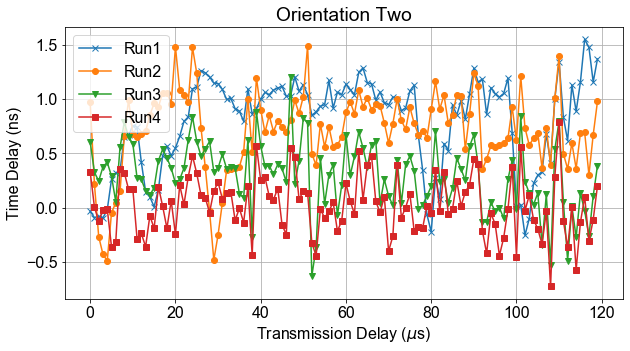

In [74]:
plt.figure(figsize=(10,5))
[plt.plot(dfO2['Delays'], dfO2[r], p, label=str(r)) for r, p in zip(dfO2.keys()[1:], ['-x', '-o', '-v', '-s'])]
plt.grid()
plt.xlabel('Transmission Delay ($\mu$s)')
plt.ylabel('Time Delay (ns)')
plt.legend()
plt.title('Orientation Two')
# plt.ylim(-0.75, 2.75)
plt.show()

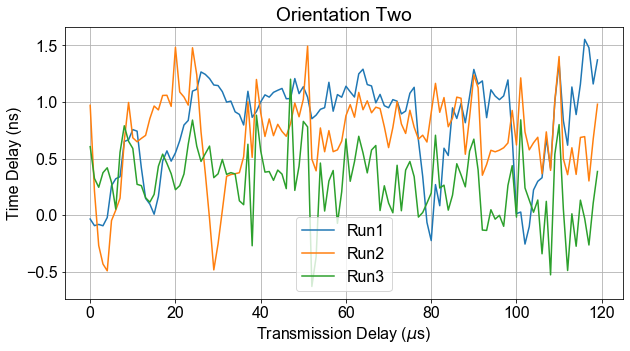

In [85]:
plt.figure(figsize=(10,5))
plt.plot(dfO2['Delays'], dfO2['Run1'], label='Run1')
plt.plot(dfO2['Delays'], dfO2['Run2'], label='Run2')
plt.plot(dfO2['Delays'], dfO2['Run3'], label='Run3')
# plt.plot(dfO2['Delays'], dfO2['Run4'], label='Run4')
plt.grid()
plt.xlabel('Transmission Delay ($\mu$s)')
plt.ylabel('Time Delay (ns)')
plt.legend()
plt.title('Orientation Two')
# plt.ylim(-0.75, 2.75)
# plt.xlim(20, 120)
plt.show()

In [ ]:
print(dfO2['Run2'][50])

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(dfO2['Delays'], dfO2['Run2'], label='Run 2')
delays_to_scat = np.arange(96, 114, 1)
[plt.scatter(i, dfO2['Run2'][i], color='r', s=50) for i in delays_to_scat]
plt.grid()
plt.xlabel('Transmission Delay ($\mu$s)')
plt.ylabel('Time Delay (ns)')
plt.legend()
plt.title('Orientation Two')
# plt.ylim(-0.75, 2.75)
plt.show()

## FFTs

In [ ]:
ffts_O1 = [fftpack.fft(dfO1[r].values) for r in dfO1.keys()[1:]]

# And the power (sig_fft is of complex dtype)
powers_O1 = [np.abs(fft)**2 for fft in ffts_O1]

# The corresponding frequencies
freq_O1 = [fftpack.fftfreq(len(dfO1[r]), d=1e-6) for r in dfO1.keys()[1:]]

In [ ]:
ffts_O2 = [fftpack.fft(dfO2[r].values) for r in dfO2.keys()[1:]]

# And the power (sig_fft is of complex dtype)
powers_O2 = [np.abs(fft)**2 for fft in ffts_O2]

# The corresponding frequencies
freq_O2 = [fftpack.fftfreq(len(dfO2[r]), d=1e-6) for r in dfO2.keys()[1:]]

In [ ]:
pos_masks_O1 = [np.where(f > 0) for f in freq_O1]
freqs_O1 = [f[pos_mask] for f, pos_mask in zip(freq_O1, pos_masks_O1)]
peak_freqs_O1 = [freqs[power[post_mask].argmax()] for freqs, power, post_mask in zip(freqs_O1, powers_O1, pos_masks_O1)]

# np.allclose(peak_freq, 1./period)

# # An inner plot to show the peak frequency
# axes = plt.axes([0.55, 0.3, 0.3, 0.5])
# plt.title('Peak frequency')
[plt.plot(freqs[:49], power[:49]) for freqs, power in zip(freqs_O1, powers_O1)] 
plt.ylim(0,300)

In [ ]:
pos_masks_O2 = [np.where(f > 0) for f in freq_O2]
freqs_O2 = [f[pos_mask] for f, pos_mask in zip(freq_O2, pos_masks_O2)]
peak_freqs_O2 = [freqs[power[post_mask].argmax()] for freqs, power, post_mask in zip(freqs_O2, powers_O2, pos_masks_O2)]

# np.allclose(peak_freq, 1./period)

# # An inner plot to show the peak frequency
# axes = plt.axes([0.55, 0.3, 0.3, 0.5])
# plt.title('Peak frequency')
[plt.plot(freqs[:49], power[:49]) for freqs, power in zip(freqs_O2, powers_O2)] 
plt.ylim(0,300)

### Orientation 1

In [ ]:
fig, ax  = plt.subplots(2, 1, figsize=(10, 7))
[ax[0].plot(f/1000, p, label=str(r)) for f, p, r in zip(freq_O1, powers_O1, dfO1.keys()[1:])]
ax[0].legend()
ax[0].grid()
[ax[1].plot(f/1000, p, label=str(r)) for f, p, r in zip(freq_O1, powers_O1, dfO1.keys()[1:])]
ax[1].legend()
ax[1].grid()
ax[1].set_ylim(0, 300)
ax[1].set_xlim(0, 500)
plt.show()

### Orientation 2

In [ ]:
fig, ax  = plt.subplots(2, 1, figsize=(10, 7))
[ax[0].plot(f/1000, p, label=str(r)) for f, p, r in zip(freq_O2, powers_O2, dfO2.keys()[1:])]
ax[0].legend()
ax[0].grid()
[ax[1].plot(f/1000, p, label=str(r)) for f, p, r in zip(freq_O2, powers_O2, dfO2.keys()[1:])]
ax[1].legend()
ax[1].grid()
ax[1].set_ylim(0, 300)
ax[1].set_xlim(0, 60)
plt.show()

In [ ]:
def notch(f, fft, freqs):
    fft_fil = fft.copy()
    fft_fil[np.abs(freqs) > f] = 0
    fft_fil[np.abs(freqs) < f] = 0
    filtered_sig = fftpack.ifft(fft_fil)
    return filtered_sig

### Orientation 1; Run 1

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(freqs_O1[0][:49]/1000, powers_O1[0][:49], color = 'b')
ax.set_ylim(0, 300)
# ax.set_xlim(0, 500000)
ax.set_xlabel('Frequency [kHz]')
ax.set_ylabel('Power [A.U.]')
freqs_to_scat = [414141.4141414142, 363636.3636363637, 339000, 292500, 242500, 70707.07070707071, 20202.020202020205]
freqs_to_filter = [414141.4141414142, 363636.3636363637, 343434.34343434346, 
                   peak_freqs_O1[0], 242424.24242424246, 70707.07070707071, 
                   20202.020202020205]
powers_to_scat = [50, 52, 65, 160, 30, 30, 50]
markers = ['o', 'X', 'v', 's', 'd', '*', 'P', 'p']
colors = ['r', 'g', 'm', 'c', 'brown', 'purple', 'gold', 'deeppink']
[ax.scatter(f/1000, p, s = 100, marker = s,  color = c, edgecolors='k') for f, p, s, c  in 
 zip(freqs_to_scat, powers_to_scat, markers, colors)]
ax.grid()
plt.show()

nrows = 7
fig, ax = plt.subplots(nrows, 1, figsize=(10, 20), sharex = True)
[ax[i].plot(dfO1['Delays'], notch(f, ffts_O1[0], freq_O1[0]), '-'+m, 
            color = c, linewidth=3, label='Filtered signal') for i, f, m, c in zip(range(nrows), freqs_to_filter, markers, 
                                                                                   colors)]
ax[6].set_xlabel('Transmission Delay [$\mu$s]')
[ax[i].plot(dfO1['Delays'], dfO1['Run1'], '-x', label='Original signal', color = 'b', alpha=0.25) for i in range(nrows)]
[ax[i].legend(loc='best') for i in range(nrows)]
[ax[i].set_ylabel('Amplitude [A.U.]') for i in range(nrows)]
[ax[i].grid() for i in range(nrows)]
plt.tight_layout()
plt.show()

# plt.figure(figsize = (10, 4))
# plt.plot(dfO1['Delays'],dfO1['Run1'], '-x', color = 'b', alpha = 0.25)
# plt.plot(dfO1['Delays'], dfO1['Run1'] - (notch(20202.020202020205, ffts_O1[0], freq_O1[0])+
#                                        notch(70707.07070707071, ffts_O1[0], freq_O1[0])+
#                                        notch(242424.24242424246, ffts_O1[0], freq_O1[0])+
#                                        notch(peak_freqs_O1[0], ffts_O1[0], freq_O1[0])+
#                                        notch(343434.34343434346, ffts_O1[0], freq_O1[0])+
#                                        notch(363636.3636363637, ffts_O1[0], freq_O1[0])+
#                                         notch(414141.4141414142, ffts_O1[0], freq_O1[0])), color = 'r')
# plt.xlabel('Transmission Delay [$\mu$s]')
# plt.ylabel('Amplitude')
# plt.grid()
# plt.show()

### Orientation 1; Run 2

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(freqs_O1[1][:49]/1000, powers_O1[1][:49], color = 'b')
ax.set_ylim(0, 300)
# ax.set_xlim(0, 500000)
ax.set_xlabel('Frequency [kHz]')
ax.set_ylabel('Power [A.U.]')
freqs_to_scat = [444444.44444444, 343434.34343434, 323232.32323232, 292500, 242500, 151515.15151515155, 20202.020202020205]
freqs_to_filter = [freqs_O1[1][43], freqs_O1[1][33], freqs_O1[1][31], 
                   peak_freqs_O1[1], 242424.24242424246, 141414.14141414143, 
                   20202.020202020205]
powers_to_scat = [35, 75, 70, 85, 30, 30, 66]
markers = ['o', 'X', 'v', 's', 'd', '*', 'P', 'p']
colors = ['r', 'g', 'm', 'c', 'brown', 'purple', 'gold', 'deeppink']
[ax.scatter(f/1000, p, s = 100, marker = s,  color = c, edgecolors='k') for f, p, s, c  in 
 zip(freqs_to_scat, powers_to_scat, markers, colors)]
ax.grid()
plt.show()

nrows = 7
fig, ax = plt.subplots(nrows, 1, figsize=(10, 20), sharex = True)
[ax[i].plot(dfO1['Delays'], notch(f, ffts_O1[1], freq_O1[1]), '-'+m, 
            color = c, linewidth=3, label='Filtered signal') for i, f, m, c in zip(range(nrows), freqs_to_filter, markers, 
                                                                                   colors)]
ax[6].set_xlabel('Transmission Delay [$\mu$s]')
[ax[i].plot(dfO1['Delays'], dfO1['Run2'], '-x', label='Original signal', color = 'b', alpha=0.25) for i in range(nrows)]
[ax[i].legend(loc='best') for i in range(nrows)]
[ax[i].set_ylabel('Amplitude [A.U.]') for i in range(nrows)]
[ax[i].grid() for i in range(nrows)]
plt.tight_layout()
plt.show()

# plt.figure(figsize = (10, 4))
# plt.plot(dfO1['Delays'],dfO1['Run1'], '-x', color = 'b', alpha = 0.25)
# plt.plot(dfO1['Delays'], dfO1['Run1'] - (notch(20202.020202020205, ffts_O1[0], freq_O1[0])+
#                                        notch(70707.07070707071, ffts_O1[0], freq_O1[0])+
#                                        notch(242424.24242424246, ffts_O1[0], freq_O1[0])+
#                                        notch(peak_freqs_O1[0], ffts_O1[0], freq_O1[0])+
#                                        notch(343434.34343434346, ffts_O1[0], freq_O1[0])+
#                                        notch(363636.3636363637, ffts_O1[0], freq_O1[0])+
#                                         notch(414141.4141414142, ffts_O1[0], freq_O1[0])), color = 'r')
# plt.xlabel('Transmission Delay [$\mu$s]')
# plt.ylabel('Amplitude')
# plt.grid()
# plt.show()

### Orientation 1; Run 3

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(freqs_O1[2][:49]/1000, powers_O1[2][:49], color = 'b')
ax.set_ylim(0, 300)
# ax.set_xlim(0, 500000)
ax.set_xlabel('Frequency [kHz]')
ax.set_ylabel('Power [A.U.]')
freqs_to_scat = [444444.44444444, 333333.33333333, 292500, 222222.22222222, 151515.15151515, 60606.06060606, 20202.020202020205]
freqs_to_filter = [freqs_O1[2][43], freqs_O1[2][32], 
                   peak_freqs_O1[2], freqs_O1[2][21], freqs_O1[2][14], freqs_O1[2][5], 
                   freqs_O1[2][1]]
powers_to_scat = [45, 118, 135, 40, 52, 55, 138]
markers = ['o', 'X', 'v', 's', 'd', '*', 'P', 'p']
colors = ['r', 'g', 'm', 'c', 'brown', 'purple', 'gold', 'deeppink']
[ax.scatter(f/1000, p, s = 100, marker = s,  color = c, edgecolors='k') for f, p, s, c  in 
 zip(freqs_to_scat, powers_to_scat, markers, colors)]
ax.grid()
plt.show()

nrows = 7
fig, ax = plt.subplots(nrows, 1, figsize=(10, 20), sharex = True)
[ax[i].plot(dfO1['Delays'], notch(f, ffts_O1[2], freq_O1[2]), '-'+m, 
            color = c, linewidth=3, label='Filtered signal') for i, f, m, c in zip(range(nrows), freqs_to_filter, markers, 
                                                                                   colors)]
ax[6].set_xlabel('Transmission Delay [$\mu$s]')
[ax[i].plot(dfO1['Delays'], dfO1['Run3'], '-x', label='Original signal', color = 'b', alpha=0.25) for i in range(nrows)]
[ax[i].legend(loc='best') for i in range(nrows)]
[ax[i].set_ylabel('Amplitude [A.U.]') for i in range(nrows)]
[ax[i].grid() for i in range(nrows)]
plt.tight_layout()
plt.show()

# plt.figure(figsize = (10, 4))
# plt.plot(dfO1['Delays'],dfO1['Run1'], '-x', color = 'b', alpha = 0.25)
# plt.plot(dfO1['Delays'], dfO1['Run1'] - (notch(20202.020202020205, ffts_O1[0], freq_O1[0])+
#                                        notch(70707.07070707071, ffts_O1[0], freq_O1[0])+
#                                        notch(242424.24242424246, ffts_O1[0], freq_O1[0])+
#                                        notch(peak_freqs_O1[0], ffts_O1[0], freq_O1[0])+
#                                        notch(343434.34343434346, ffts_O1[0], freq_O1[0])+
#                                        notch(363636.3636363637, ffts_O1[0], freq_O1[0])+
#                                         notch(414141.4141414142, ffts_O1[0], freq_O1[0])), color = 'r')
# plt.xlabel('Transmission Delay [$\mu$s]')
# plt.ylabel('Amplitude')
# plt.grid()
# plt.show()

### Orientation 2; Run 1

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(freqs_O2[0]/1000, powers_O2[0][:59], color = 'b')
ax.set_ylim(0, 100)
# ax.set_xlim(0, 500000)
ax.set_xlabel('Frequency [kHz]')
ax.set_ylabel('Power [A.U.]')
freqs_to_scat = [466666.66666667, 258333.33333333, 83333.33333333, 58333.33333333, 50000., 33333.33333333, 8333.33333333]
freqs_to_filter = [freqs_O2[0][55], freqs_O2[0][30], freqs_O2[0][9], 
                   freqs_O2[0][6], freqs_O2[0][5], freqs_O2[0][3], 
                   freqs_O2[0][0]]
powers_to_scat = [10, 8, 8, 20, 45, 45, 100]
markers = ['o', 'X', 'v', 's', 'd', '*', 'P', 'p']
colors = ['r', 'g', 'm', 'c', 'brown', 'purple', 'gold', 'deeppink']
[ax.scatter(f/1000, p, s = 100, marker = s,  color = c, edgecolors='k') for f, p, s, c  in 
 zip(freqs_to_scat, powers_to_scat, markers, colors)]
ax.grid()
plt.show()

nrows = 7
fig, ax = plt.subplots(nrows, 1, figsize=(10, 20), sharex = True)
[ax[i].plot(dfO2['Delays'], notch(f, ffts_O2[0], freq_O2[0]), '-'+m, 
            color = c, linewidth=3, label='Filtered signal') for i, f, m, c in zip(range(nrows), freqs_to_filter, markers, 
                                                                                   colors)]
ax[6].set_xlabel('Transmission Delay [$\mu$s]')
[ax[i].plot(dfO2['Delays'], dfO2['Run1'], '-x', label='Original signal', color = 'b', alpha=0.25) for i in range(nrows)]
[ax[i].legend(loc='best') for i in range(nrows)]
[ax[i].set_ylabel('Amplitude [A.U.]') for i in range(nrows)]
[ax[i].grid() for i in range(nrows)]
plt.tight_layout()
plt.show()

# plt.figure(figsize = (10, 4))
# plt.plot(dfO1['Delays'],dfO1['Run1'], '-x', color = 'b', alpha = 0.25)
# plt.plot(dfO1['Delays'], dfO1['Run1'] - (notch(20202.020202020205, ffts_O1[0], freq_O1[0])+
#                                        notch(70707.07070707071, ffts_O1[0], freq_O1[0])+
#                                        notch(242424.24242424246, ffts_O1[0], freq_O1[0])+
#                                        notch(peak_freqs_O1[0], ffts_O1[0], freq_O1[0])+
#                                        notch(343434.34343434346, ffts_O1[0], freq_O1[0])+
#                                        notch(363636.3636363637, ffts_O1[0], freq_O1[0])+
#                                         notch(414141.4141414142, ffts_O1[0], freq_O1[0])), color = 'r')
# plt.xlabel('Transmission Delay [$\mu$s]')
# plt.ylabel('Amplitude')
# plt.grid()
# plt.show()

### Orientation 2; Run 2

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(freqs_O2[1]/1000, powers_O2[1][:59], color = 'b')
ax.set_ylim(0, 100)
ax.set_xlim(0, 100)
# ax.set_xlim(0, 500000)
ax.set_xlabel('Frequency [kHz]')
ax.set_ylabel('Power [A.U.]')
freqs_to_scat = [358333.33333333, 66666.66666667, 58333.33333333, 50000., 41666.66666667, 33333.33333333, 8333.33333333]
freqs_to_filter = [freqs_O2[1][42],freqs_O2[1][42], freqs_O2[1][7], freqs_O2[1][6], 
                   freqs_O2[1][5], freqs_O2[1][4], freqs_O2[1][3], 
                   freqs_O2[1][0]]
powers_to_scat = [6, 30, 10, 93, 90, 8, 100]
markers = ['o', 'X', 'v', 's', 'd', '*', 'P', 'p']
colors = ['r', 'g', 'm', 'c', 'brown', 'purple', 'gold', 'deeppink']
[ax.scatter(f/1000, p, s = 100, marker = s,  color = c, edgecolors='k') for f, p, s, c  in 
 zip(freqs_to_scat, powers_to_scat, markers, colors)]
ax.grid()
plt.show()

nrows = 7
fig, ax = plt.subplots(nrows, 1, figsize=(10, 20), sharex = True)
[ax[i].plot(dfO2['Delays'], notch(f, ffts_O2[1], freq_O2[1]), '-'+m, 
            color = c, linewidth=3, label='Filtered signal') for i, f, m, c in zip(range(nrows), freqs_to_filter, markers, 
                                                                                   colors)]
ax[6].set_xlabel('Transmission Delay [$\mu$s]')
[ax[i].plot(dfO2['Delays'], dfO2['Run2'], '-x', label='Original signal', color = 'b', alpha=0.25) for i in range(nrows)]
[ax[i].legend(loc='best') for i in range(nrows)]
[ax[i].set_ylabel('Amplitude [A.U.]') for i in range(nrows)]
[ax[i].grid() for i in range(nrows)]
plt.tight_layout()
plt.show()

plt.figure(figsize = (10, 4))
plt.plot(dfO2['Delays'],dfO2['Run2'], '-x', color = 'b', alpha = 0.25)
plt.plot(dfO2['Delays'], dfO2['Run2']
         -notch(freqs_O2[1][2],ffts_O2[1],freq_O2[1])
         -notch(freqs_O2[1][3],ffts_O2[1],freq_O2[1])
         -notch(freqs_O2[1][4],ffts_O2[1],freq_O2[1])
         -notch(freqs_O2[1][5],ffts_O2[1],freq_O2[1])
         -notch(freqs_O2[1][6],ffts_O2[1],freq_O2[1])
         -notch(freqs_O2[1][7],ffts_O2[1],freq_O2[1])
         -notch(freqs_O2[1][8],ffts_O2[1],freq_O2[1])
         -notch(freqs_O2[1][9],ffts_O2[1],freq_O2[1]),
         color = 'r')
plt.xlabel('Transmission Delay [$\mu$s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

### Orientation 2; Run 3

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(freqs_O2[2]/1000, powers_O2[2][:59], color = 'b')
ax.set_ylim(0, 100)
ax.set_xlim(0, 100)
# ax.set_xlim(0, 500000)
ax.set_xlabel('Frequency [kHz]')
ax.set_ylabel('Power [A.U.]')
freqs_to_scat = [491666.66666667, 475000., 358333.33333333, 50000., 
                 25000., 16666.66666667, 8333.33333333]
freqs_to_filter = [freqs_O2[2][58], freqs_O2[2][56], freqs_O2[2][42], 
                   freqs_O2[2][5], freqs_O2[2][2], freqs_O2[2][1], 
                   freqs_O2[2][0]]
powers_to_scat = [8, 10, 6, 8, 12, 80, 100]
markers = ['o', 'X', 'v', 's', 'd', '*', 'P', 'p']
colors = ['r', 'g', 'm', 'c', 'brown', 'purple', 'gold', 'deeppink']
[ax.scatter(f/1000, p, s = 100, marker = s,  color = c, edgecolors='k') for f, p, s, c  in 
 zip(freqs_to_scat, powers_to_scat, markers, colors)]
ax.grid()
plt.show()

nrows = 7
fig, ax = plt.subplots(nrows, 1, figsize=(10, 20), sharex = True)
[ax[i].plot(dfO2['Delays'], notch(f, ffts_O2[2], freq_O2[2]), '-'+m, 
            color = c, linewidth=3, label='Filtered signal') for i, f, m, c in zip(range(nrows), freqs_to_filter, markers, 
                                                                                   colors)]
ax[6].set_xlabel('Transmission Delay [$\mu$s]')
[ax[i].plot(dfO2['Delays'], dfO2['Run3'], '-x', label='Original signal', color = 'b', alpha=0.25) for i in range(nrows)]
[ax[i].legend(loc='best') for i in range(nrows)]
[ax[i].set_ylabel('Amplitude [A.U.]') for i in range(nrows)]
[ax[i].grid() for i in range(nrows)]
plt.tight_layout()
plt.show()

# plt.figure(figsize = (10, 4))
# plt.plot(dfO1['Delays'],dfO1['Run1'], '-x', color = 'b', alpha = 0.25)
# plt.plot(dfO1['Delays'], dfO1['Run1'] - (notch(20202.020202020205, ffts_O1[0], freq_O1[0])+
#                                        notch(70707.07070707071, ffts_O1[0], freq_O1[0])+
#                                        notch(242424.24242424246, ffts_O1[0], freq_O1[0])+
#                                        notch(peak_freqs_O1[0], ffts_O1[0], freq_O1[0])+
#                                        notch(343434.34343434346, ffts_O1[0], freq_O1[0])+
#                                        notch(363636.3636363637, ffts_O1[0], freq_O1[0])+
#                                         notch(414141.4141414142, ffts_O1[0], freq_O1[0])), color = 'r')
# plt.xlabel('Transmission Delay [$\mu$s]')
# plt.ylabel('Amplitude')
# plt.grid()
# plt.show()

### Orientation 2; Run 4

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(freqs_O2[3]/1000, powers_O2[3][:59], color = 'b')
ax.set_ylim(0, 100)
# ax.set_xlim(0, 500000)
ax.set_xlabel('Frequency [kHz]')
ax.set_ylabel('Power [A.U.]')
freqs_to_scat = [450000., 58333.33333333, 50000., 33333.33333333, 25000., 
                 16666.66666667, 8333.33333333]
freqs_to_filter = [freqs_O2[3][53], freqs_O2[3][6], freqs_O2[3][5], 
                   freqs_O2[3][3], freqs_O2[3][2], freqs_O2[3][1], 
                   freqs_O2[3][0]]
powers_to_scat = [8, 21, 24, 25, 60, 100, 100]
markers = ['o', 'X', 'v', 's', 'd', '*', 'P', 'p']
colors = ['r', 'g', 'm', 'c', 'brown', 'purple', 'gold', 'deeppink']
[ax.scatter(f/1000, p, s = 100, marker = s,  color = c, edgecolors='k') for f, p, s, c  in 
 zip(freqs_to_scat, powers_to_scat, markers, colors)]
ax.grid()
plt.show()

nrows = 7
fig, ax = plt.subplots(nrows, 1, figsize=(10, 20), sharex = True)
[ax[i].plot(dfO2['Delays'], notch(f, ffts_O2[3], freq_O2[3]), '-'+m, 
            color = c, linewidth=3, label='Filtered signal') for i, f, m, c in zip(range(nrows), freqs_to_filter, markers, 
                                                                                   colors)]
ax[6].set_xlabel('Transmission Delay [$\mu$s]')
[ax[i].plot(dfO2['Delays'], dfO2['Run4'], '-x', label='Original signal', color = 'b', alpha=0.25) for i in range(nrows)]
[ax[i].legend(loc='best') for i in range(nrows)]
[ax[i].set_ylabel('Amplitude [A.U.]') for i in range(nrows)]
[ax[i].grid() for i in range(nrows)]
plt.tight_layout()
plt.show()

# plt.figure(figsize = (10, 4))
# plt.plot(dfO1['Delays'],dfO1['Run1'], '-x', color = 'b', alpha = 0.25)
# plt.plot(dfO1['Delays'], dfO1['Run1'] - (notch(20202.020202020205, ffts_O1[0], freq_O1[0])+
#                                        notch(70707.07070707071, ffts_O1[0], freq_O1[0])+
#                                        notch(242424.24242424246, ffts_O1[0], freq_O1[0])+
#                                        notch(peak_freqs_O1[0], ffts_O1[0], freq_O1[0])+
#                                        notch(343434.34343434346, ffts_O1[0], freq_O1[0])+
#                                        notch(363636.3636363637, ffts_O1[0], freq_O1[0])+
#                                         notch(414141.4141414142, ffts_O1[0], freq_O1[0])), color = 'r')
# plt.xlabel('Transmission Delay [$\mu$s]')
# plt.ylabel('Amplitude')
# plt.grid()
# plt.show()

In [ ]:
plt.figure(figsize=(12,5))
# [plt.plot(dfO2['Delays'], dfO2[r], '-'+s, label=r, color = 'b', alpha=0.25) 
#  for r, s in zip(dfO2.keys()[1:], ['x', 'v', 's', 'd'])]
plt.plot(dfO2['Delays'], dfO2['Run2'], '-x', label='Run 2', color = 'b', alpha=0.5)
plt.plot(dfO2['Delays'], dfO2['Run3'], '-x', label='Run 3', color = 'g', alpha=0.5)
plt.plot(dfO2['Delays'][42:57], dfO2['Run2'][42:57], '-x', color = 'r')
plt.plot(dfO2['Delays'][68:83], dfO2['Run2'][68:83], '-x', color = 'r')
plt.plot(dfO2['Delays'][98:111], dfO2['Run2'][98:111], '-x', color = 'r')
plt.xlabel('Transmission Delay [$\mu$s]')
plt.ylabel('Time Delay [ns]')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# sos = signal.butter(1, (5e-3,85e-3), 'bp', fs=2e6, output='sos')
sos = signal.butter(1, 10e-3, 'hp', fs=2e6, output='sos')
filtered = signal.sosfilt(sos, dfO2['Run2'])

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

ax1.plot(dfO2['Delays'], dfO2['Run2'], '-x', label='Run 2', color = 'b', alpha=0.5)
ax2.plot(dfO2['Delays'], filtered)
ax3.plot(dfO2['Delays'], np.subtract(dfO2['Run2'], filtered))
plt.tight_layout()
plt.show()

In [ ]:
sos = signal.butter(1, , 'low', fs=2e6, output='sos')
filtered = signal.sosfilt(sos, dfO1['Run1'])

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax1.plot(dfO1['Delays'], dfO1['Run1'], '-x', label='Run 1', color = 'b', alpha=0.5)
ax2.plot(dfO1['Delays'], filtered, '-x', label='Run 1', color = 'b', alpha=0.5)
plt.tight_layout()
plt.show()